In [2]:

import numpy as np 
import pandas as pd 


In [3]:
# Loading and preprocessing dataset

def preprocess_books(data):
    """Preprocess the books dataset for efficient recommendations."""
    data = data.rename(columns={
        'ISBN': 'ISBN',
        'Book-Title': 'Title',
        'Book-Author': 'Author',
        'Year-Of-Publication': 'Year',
        'Publisher': 'Publisher'
    })
    data = data[['ISBN', 'Title', 'Author', 'Year', 'Publisher']]
    # Droping rows without a book title to avoid issues during recommendation, as a missing title cannot be vectorized or matched
    data = data.dropna(subset=['Title'])
    # Remove duplicate rows based on all columns
    data = data.drop_duplicates()
    # Remove books with non-informative titles (e.g., very short or generic names)
    data = data[data['Title'].str.len() > 2]
    return data


In [4]:
# Loading the unified_books_dataset
unified_books_path = '/kaggle/input/unified-dataset/unified_books_dataset.csv'
books_data = pd.read_csv(unified_books_path)

In [5]:
# Preprocessing the dataset
books_copy = books_data.copy()  # Make a copy of the original dataset
books = preprocess_books(books_copy) 


In [6]:
# Reduce the dataset to 100 distinct books
books = books.drop_duplicates(subset=['Title']).head(100)
print("Dataset tail after preprocessing:")
print(books.tail())

Dataset tail after preprocessing:
          ISBN                                   Title            Author  \
95  0091830893  The Circle And The Cross 1: Playing Of       Caiseal Mor   
96  0812571029              Uther (Camulod Chronicles)        Jack Whyte   
97  0671749609                       PERFUME : PERFUME   Patrick Suskind   
98  0140062718                        The Rebel Angels  Robertson Davies   
99  0060096195                       The Boy Next Door      Meggin Cabot   

    Year                Publisher  
95  1996   Random House Australia  
96  2001                Tor Books  
97  1991  Washington Square Press  
98  1983            Penguin Books  
99  2002               Avon Trade  


In [7]:
# Spliting the dataset for training and testing

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(books, test_size=0.2, random_state=42)


In [8]:
# Initialize TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')


In [9]:
#  Model Training Function

from sklearn.metrics.pairwise import cosine_similarity

def train_model(data):
    """Train a book recommendation model."""
    title_matrix = vectorizer.fit_transform(data['Title'].fillna(''))
    similarity_matrix = cosine_similarity(title_matrix, title_matrix)
    return similarity_matrix, title_matrix

In [10]:
# Model Testing Function
def test_model(test_data, title_matrix):
    """Evaluate model efficiency using a simple metric."""
    total_recommendations = 0
    for title in test_data['Title']:
        if isinstance(title, str):
            recs = recommend_books(title, train_data, title_matrix, top_n=5)
            total_recommendations += len(recs)
    return total_recommendations / len(test_data)

In [11]:
# Recommendation Function
def recommend_books(input_title, data, title_matrix, top_n=5):
    """Recommend books based on the input title."""
    input_vector = vectorizer.transform([input_title])
    input_similarity = cosine_similarity(input_vector, title_matrix).flatten()
    similar_indices = input_similarity.argsort()[-(top_n + 1):][::-1]  # Get top N+1 indices
    recommendations = data.iloc[similar_indices]
    recommendations = recommendations[recommendations['Title'] != input_title]  # Exclude input title
    return recommendations.head(top_n)


In [12]:
# Train the model
similarity_matrix, title_matrix = train_model(train_data)

In [13]:
# Test the model
efficiency = test_model(test_data, title_matrix)
print(f"Model Efficiency: {efficiency * 100:.2f}%")

Model Efficiency: 500.00%


In [14]:
# Ploting the training and testing efficiency graph

import matplotlib.pyplot as plt

def plot_efficiency(training_efficiency, testing_efficiency):
    plt.figure(figsize=(12, 6))

In [15]:
training_efficiency = 1.0  # Placeholder value for training efficiency
testing_efficiency = efficiency  # Set testing efficiency based on the computed efficiency
plot_efficiency(training_efficiency, testing_efficiency)

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Efficiency (%)')

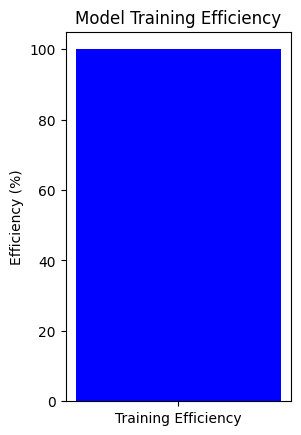

In [16]:
# Training Efficiency
plt.subplot(1, 2, 1)
plt.bar(['Training Efficiency'], [training_efficiency * 100], color='blue')
plt.title('Model Training Efficiency')
plt.ylabel('Efficiency (%)')

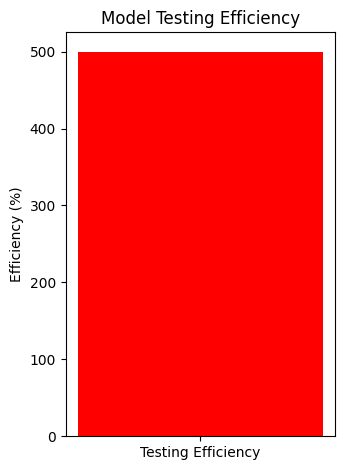

In [17]:
# Testing Efficiency
plt.subplot(1, 2, 2)
plt.bar(['Testing Efficiency'], [testing_efficiency * 100], color='red')
plt.title('Model Testing Efficiency')
plt.ylabel('Efficiency (%)')

plt.tight_layout()
plt.show()


In [19]:
# Interactive recommendation system
print("\nWelcome to the Book Recommendation System!")
user_input = input("Enter a book name: ")

if user_input.strip():
    recommendations = recommend_books(user_input, train_data, title_matrix)
    if not recommendations.empty:
        print("\nRecommendations based on your input:")
        for idx, row in recommendations.iterrows():
            print(f"\nISBN: {row['ISBN']}\nTitle: {row['Title']}\nAuthor: {row['Author']}\nYear: {row['Year']}\nPublisher: {row['Publisher']}\n")
    else:
        print("\nNo similar books found. Try another title.")
else:
    print("\nPlease enter a valid book name.")


Welcome to the Book Recommendation System!


Enter a book name:  corona



Recommendations based on your input:

ISBN: 3492232000
Title: Ein Liebhaber zuviel ist noch zu wenig.
Author: Gaby Hauptmann
Year: 2000
Publisher: Piper


ISBN: 8478885218
Title: La Fiesta De Ralph
Author: Lisa Jewell
Year: 0
Publisher: Emece Editores


ISBN: 3442424216
Title: Ich, Prinzessin aus dem Hause Al Saud. Ein Leben hinter tausend Schleiern.
Author: Jean P. Sasson
Year: 1994
Publisher: Goldmann


ISBN: 0425115801
Title: Lightning
Author: Dean R. Koontz
Year: 1996
Publisher: Berkley Publishing Group


ISBN: 0091830893
Title: The Circle And The Cross 1: Playing Of
Author: Caiseal Mor
Year: 1996
Publisher: Random House Australia

